## Task I - Data Exploration and Pre-processing
### EQ 2420 - Network Analytics

Ruihan Zhang
Nov 4, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('pandas =', pd.__version__)
print('numpy =', np.__version__)

pandas = 1.4.4
numpy = 1.21.6


In [2]:
X_KV = pd.read_csv('./JNSM_KV_flashcrowd_2/X.csv')
Y_KV = pd.read_csv('./JNSM_KV_flashcrowd_2/Y.csv')
X_VoD = pd.read_csv('./JNSM_VoD_flashcrowd_2/X.csv')
Y_VoD = pd.read_csv('./JNSM_VoD_flashcrowd_2/Y.csv')

### 1. Describe the data set
in terms of number of samples, number of features. For the target values, compute the average and the standard deviation. Further, provide the density plot of the target values.


In [71]:
print('The KV dataset has %d samples of %d features.' % X_KV.shape)
print('We are interested in %d features:' % Y_KV.columns.shape)
print(Y_KV.columns)

print('\nThe VoD dataset has %d samples of %d features.' % X_VoD.shape)
print('We are interested in %d features:' % Y_VoD.columns.shape)
print(Y_VoD.columns)

The KV dataset has 9500 samples of 1725 features.
We are interested in 4 features:
Index(['Unnamed: 0', 'TimeStamp', 'ReadsAvg', 'WritesAvg'], dtype='object')

The VoD dataset has 17500 samples of 1672 features.
We are interested in 11 features:
Index(['Unnamed: 0', 'TimeStamp', 'noAudioPlayed', 'avgInterAudioPlayedDelay',
       'NetReadOperations', 'NetReadBytes', 'NetReadAvgDelay', 'noAudioLost',
       'noAudioLate', 'DispFrames', 'AvgInterDispDelay'],
      dtype='object')


In [112]:
print( Y_KV[['ReadsAvg','WritesAvg']].mean() )
print( Y_KV[['ReadsAvg','WritesAvg']].std() )

ReadsAvg      55.205911
WritesAvg    110.461900
dtype: float64
ReadsAvg     3.110774
WritesAvg    7.972791
dtype: float64


In [5]:
cols = ['noAudioPlayed', 'avgInterAudioPlayedDelay',
       'NetReadOperations', 'NetReadBytes', 'NetReadAvgDelay', 'noAudioLost',
       'noAudioLate', 'DispFrames', 'AvgInterDispDelay']
print( Y_VoD['DispFrames'].mean() )
print( Y_VoD['DispFrames'].std() )

22.02057142857143
4.320219958594702


(50.0, 70.0)

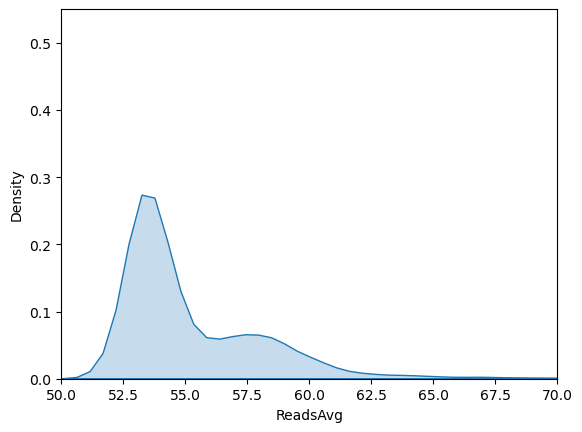

In [50]:
import seaborn as sns
# sns.displot(Y_KV, x="ReadsAvg" , kind="kde", shade =True)
# plt.ylim(bottom=0.00)
f, ax = plt.subplots() 
sns.kdeplot(Y_KV, x="ReadsAvg", fill=True)
plt.ylim(top=0.55)
plt.xlim(50,70) #Adjust the limits of the x-axis

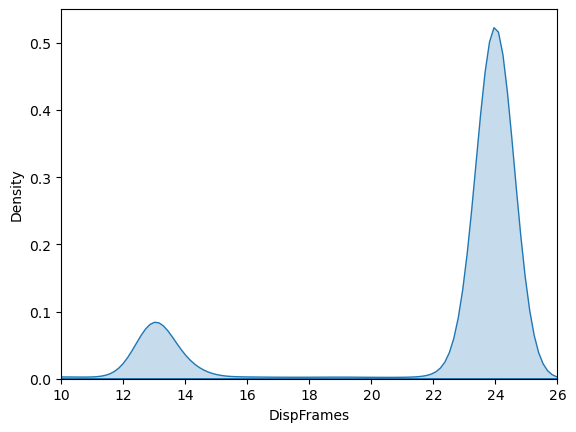

In [49]:
fig, ax = plt.subplots()
sns.kdeplot(Y_VoD, x="DispFrames", fill=True)
plt.xlim(10,26)
plt.ylim(top=0.55)
plt.show()


### 2. Pre-process the data
using the three methods below on the columns first and then on the sample rows. This step produces six design matrices $ X_1 , X_2, ..., X_6 $ as numpy arrays.

In [10]:
# get rid of the time feature and represent our data set in numpy matrix
X_K = X_KV.drop(columns=['TimeStamp','Unnamed: 0']).values
X_V = X_VoD.drop(columns=['TimeStamp','Unnamed: 0']).values

(a) $l^2$ Normalization: 
linearly scale the values of each feature column (or sample row) so that its $l^2$ -norm becomes 1.

In [34]:
# normalize for each feature column
X_K_1 = X_K / np.linalg.norm(X_K, axis=0)
X_V_1 = X_V / np.linalg.norm(X_V, axis=0)

# check the if they are correctly normalized.
print(np.linalg.norm( X_K_1, axis=0 ))
print(np.linalg.norm( X_V_1, axis=0 ))

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


/var/folders/_l/j1pck1z51v73l9fr15cdwdvm0000gn/T/ipykernel_85633/1393491938.py:2: RuntimeWarning: invalid value encountered in true_divide
  X_K_1 = X_K / np.linalg.norm(X_K, axis=0)
/var/folders/_l/j1pck1z51v73l9fr15cdwdvm0000gn/T/ipykernel_85633/1393491938.py:3: RuntimeWarning: invalid value encountered in true_divide
  X_V_1 = X_V / np.linalg.norm(X_V, axis=0)


In [30]:
# normalize for each feature column
X_K_2 = (X_K.T / np.linalg.norm(X_K, axis=1)).T
X_V_2 = (X_V.T / np.linalg.norm(X_V, axis=1)).T

# check the norm
print(np.linalg.norm( X_K_2, axis=1 ))
print(np.linalg.norm( X_V_2, axis=1 ))

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


(b) Restriction to interval: linearly map the values of each feature column (or sample row) so that all they lie within the interval [0,1].

In [58]:
# using for loops
rows, cols = X_K.shape
X_K_3 = np.zeros(X_K.shape)
for i in range(cols):
    max = X_K[:,i].max()
    min = X_K[:,i].min()
    X_K_3[:,i] = (X_K[:,i] - min) / (max - min)
# validate my result
print(np.max(X_K_3,axis=0))
print(np.min(X_K_3,axis=0))

[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]


/var/folders/_l/j1pck1z51v73l9fr15cdwdvm0000gn/T/ipykernel_85633/2268241103.py:7: RuntimeWarning: invalid value encountered in true_divide
  X_K_3[:,i] = (X_K[:,i] - min) / (max - min)


In [41]:
# using python broadcasting 
X_K_3 = (X_K - np.min(X_K, 0)) / (np.max(X_K,0) - np.min(X_K,0))
X_K_4 = ( (X_K.T - np.min(X_K, 1)) / (np.max(X_K,1) - np.min(X_K,1)) ).T


/var/folders/_l/j1pck1z51v73l9fr15cdwdvm0000gn/T/ipykernel_85633/3688768700.py:1: RuntimeWarning: invalid value encountered in true_divide
  X_K_3 = (X_K - np.min(X_K, 0)) / (np.max(X_K,0) - np.min(X_K,0))


array([1., 1., 1., ..., 1., 1., 1.])

In [44]:
# the same method with KV dataset
X_V_3 = (X_V - np.min(X_V, 0)) / (np.max(X_V,0) - np.min(X_V,0))
X_V_4 = ( (X_V.T - np.min(X_V, 1)) / (np.max(X_V,1) - np.min(X_V,1)) ).T

/var/folders/_l/j1pck1z51v73l9fr15cdwdvm0000gn/T/ipykernel_85633/1226411600.py:1: RuntimeWarning: invalid value encountered in true_divide
  X_V_3 = (X_V - np.min(X_V, 0)) / (np.max(X_V,0) - np.min(X_V,0))


array([0., 0., 0., ..., 0., 0., 0.])

(c) Standardization: linearly map the values of each feature column (or sample row) so that they have 0 mean and a variance of 1.

In [57]:
X_K_5 = (X_K - np.mean(X_K,0)) / np.std(X_K,0)
X_K_6 = ( (X_K.T - np.mean(X_K,1)) / np.std(X_K,1) ).T
print(np.mean(X_K_6,1)) # close enough to zero
print(np.var(X_K_6,1))

[ 4.37275160e-17 -4.23421535e-17 -1.56086854e-16 ...  1.94208485e-16
  2.24493153e-16  1.12762060e-17]
[1. 1. 1. ... 1. 1. 1.]


/var/folders/_l/j1pck1z51v73l9fr15cdwdvm0000gn/T/ipykernel_85633/1359293357.py:1: RuntimeWarning: invalid value encountered in true_divide
  X_K_5 = (X_K - np.mean(X_K,0)) / np.std(X_K,0)


In [59]:
X_V_5 = (X_V - np.mean(X_V,0)) / np.std(X_V,0)
X_V_6 = ( (X_V.T - np.mean(X_V,1)) / np.std(X_V,1) ).T

/var/folders/_l/j1pck1z51v73l9fr15cdwdvm0000gn/T/ipykernel_85633/1161762528.py:1: RuntimeWarning: invalid value encountered in true_divide
  X_V_5 = (X_V - np.mean(X_V,0)) / np.std(X_V,0)


### 3. Reduce the original data set
Use a tree-based method to select the top 16 features. Create a correlation matrix of X and Y columns. This is a square matrix whose cells show the correlation between two features or between a feature and the target Y . Plot a heatmap of the correlation matrix. Describe and comment on your observations of this matrix.


In [ ]:
# feature selection algorithm
from sklearn import ensemble
regr = ensemble.ExtraTreesRegressor(n_jobs=-1)
regr.fit(X_K, Y_KV)
select = np.argsort(regr.feature_importances_)[-16:]
np.save("select_KV", select)

In [7]:
select_KV = np.load('select_KV.npy')
select_VoD = np.load('select_VoD.npy')

X_KV = pd.read_csv('./JNSM_KV_flashcrowd_2/X.csv').drop(columns=['TimeStamp','Unnamed: 0']).iloc[:,select_KV]
Y_KV = pd.read_csv('./JNSM_KV_flashcrowd_2/Y.csv')['ReadsAvg']

X_VoD = pd.read_csv('./JNSM_VoD_flashcrowd_2/X.csv').drop(columns=['TimeStamp','Unnamed: 0']).iloc[:,select_VoD]
Y_VoD = pd.read_csv('./JNSM_VoD_flashcrowd_2/Y.csv')['DispFrames']

In [ ]:
# feature selection algorithm
# regr = ensemble.ExtraTreesRegressor(n_jobs=-1)
# regr.fit(X, y)
# select = np.argsort(regr.feature_importances_)[-16:]
# np.save("select_KV", select)

In [22]:
corr1 = X_KV.join(Y_KV).corr()
corr2 = X_VoD.join(Y_VoD).corr()

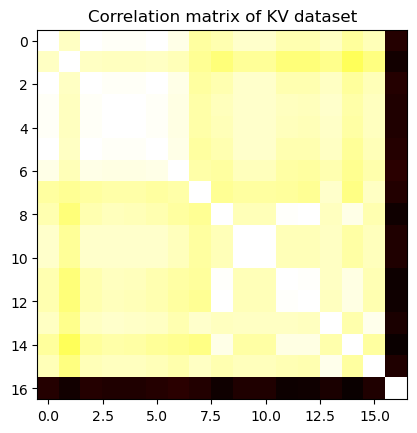

In [13]:
plt.title('Correlation matrix of KV dataset')
plt.imshow(corr1,cmap='hot',interpolation='nearest')
plt.show()

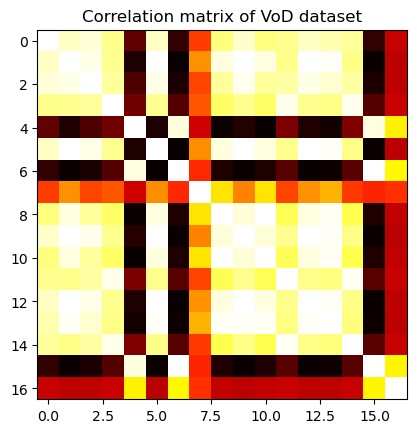

In [16]:
plt.title('Correlation matrix of VoD dataset')
plt.imshow(corr2,cmap='hot',interpolation='nearest')
plt.show()

<AxesSubplot:>

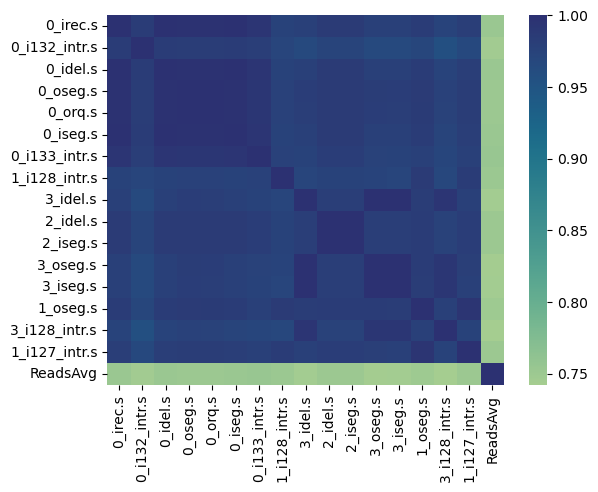

In [20]:
import seaborn as sns
sns.heatmap(corr1, cmap="crest")

<AxesSubplot:>

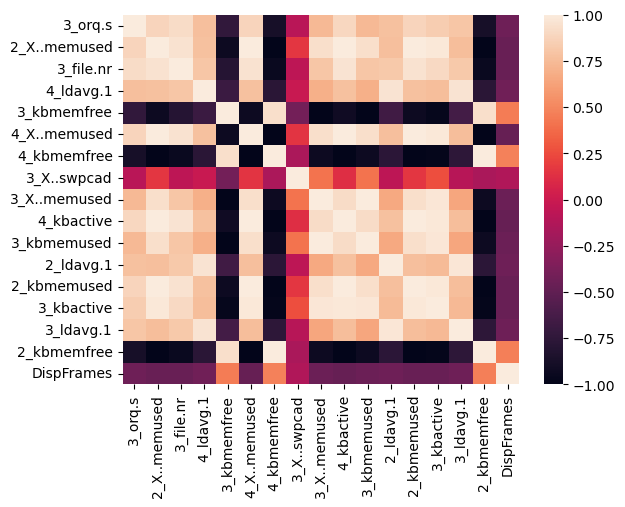

In [24]:
import seaborn as sns
sns.heatmap(corr2)

### Quiz 1
Given the design matrix X and Y, use the closed form solution to compute the model parameters θ for the equation y = θT x + b ([2] page 104). Using these parameters, predict the target value for the given sample x1 = [1 3 1]. Compute the NMAE and R2 for the training set.

In [122]:
# our given training data
X = np.array([[2, 5, 8],[10, 2, 12],[4, 3, 2]])
Y = np.array([7, 2, 6])

# test data
x1 = np.array([1, 3, 1])

In [93]:
def mse(Y, Yhat):
    return ((Y - Yhat)**2).mean()

def nmae(Y, Yhat):
    return (abs(Y - Yhat)).mean() / Y.mean()


In [124]:
theta = np.linalg.inv( X @ X.T ) @ X @ Y
Yhat = theta @ X

print('The mean squre error of our model on the training set is:',mse(Y,Yhat))
print('The normalized mean absolute error of our model on the training set is:',nmae(Y,Yhat))

The mean squre error of our model on the training set is: 1.314768175368353e-30
The normalized mean absolute error of our model on the training set is: 1.7763568394002506e-16
